# Classification of Obfuscated Text

Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import string
import seaborn as sns

In [2]:
from keras.models import load_model
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
# Import configuration files and model
from config import cfg
from RNN import RNN

# Data preparation

In [4]:
#Import data and labels for training 
X_raw = open('xtrain_obfuscated.txt', 'r')
X = [data.strip('\n') for data in X_raw]

In [5]:
# See sample data
print(X[0])


satwamuluhqgulamlrmvezuhqvkrpmletwulcitwskuhlemvtwamuluhiwiwenuhlrvimvqvkruhulenamuluhqgqvtwvimviwuhtwamuluhulqvkrenamcitwuhvipmpmqvuhskiwkrpmdfuhlrvimvskvikrpmqvuhskmvgzenleuhqvmvamuluhulenamuluhqvletwtwvipmpmgzleenamuhtwamuluhtwletwdfuhiwkrxeleentwxeuhpmqvuhtwiwmvamdfuhpkeztwamuluhvimvuhqvtwmkpmpmlelruhgztwtwskuhtwlrkrpmlruhpmuluhqvenuhtwyplepmxeuhenuhamypkrqvuhamulmvdfuhqvskentwamletwlrlrpmiwuhtwamul


We can observe the fllowing :

    * There is no blank space in line. This implies that we cannot separate a line in terms of "words", but in terms of characters.
    
    * The characters used are small case alphaets only. Hence vocabulary size is 26.
    

In [6]:
#Label list. Not used but for refernce.
Y_label = open('ylabel.txt','r').read().split('\n') 
#Y_label = [int(data.strip('\n')) for data in Y_label]
print(Y_label)

['alice_in_wonderland', 'dracula', 'dubliners', 'great_expectations', 'hard_times', 'huckleberry_finn', 'les_miserable', 'moby_dick', 'oliver_twist', 'peter_pan', 'talw_of_two_cities', 'tom_sawyer']


In [7]:
# Import the labels for the training. 
Y_raw = open('ytrain.txt','r')
Y = [int(data.strip('\n')) for data in Y_raw]


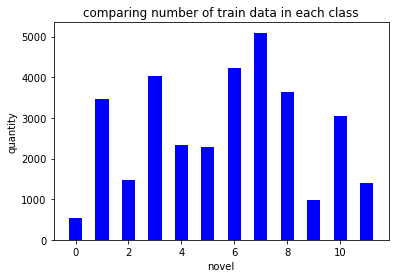

In [8]:
import matplotlib.pyplot as plt

plt.hist(Y, bins=range(min(Y), max(Y) + 2, 1),
              alpha=1,rwidth =0.5,align ="left", color="blue")
plt.xlabel("novel")
plt.ylabel("quantity")
plt.title("comparing number of train data in each class")
plt.show()

We can see that the classes are imbalanced. Novel 8 has almost 10 times the sample of Novel 1.

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20)

In [10]:
#The label is one hot encoded for the 12 novels to match the final output layer of the network.
Y_train = to_categorical(Y_train)
print(Y_train[0:10])
print(np.shape(Y_train))

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
(26010, 12)


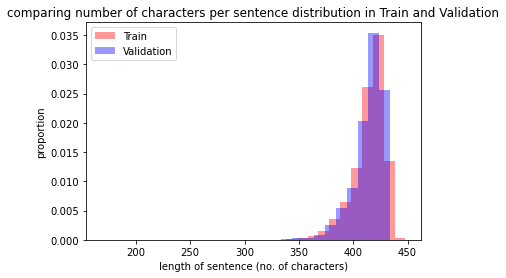

In [11]:
# Length of train and validation data distribution

sentence_lengths_train = [ len(sent) for sent in X_train]
sentence_lengths_test = [ len(sent) for sent in X_val]

plt.hist(sentence_lengths_train, bins=range(min(sentence_lengths_train), max(sentence_lengths_train) + 1, 10), 
              alpha=0.4, color="red", density=True)
plt.hist(sentence_lengths_test, bins=range(min(sentence_lengths_test), max(sentence_lengths_test) + 1, 10),
              alpha=0.4, color="blue", density=True)
labels = ['Train',"Validation"]
plt.legend(labels)
plt.xlabel("length of sentence (no. of characters)")
plt.ylabel("proportion")
plt.title("comparing number of characters per sentence distribution in Train and Validation")
plt.show()

The distribution in traning data set and test data set is almost similar!

## Data Preprocesing : Tokenizing the data set 

To feed the data to the network, the dtaa set has to be converted to "tokens". As the sentences do not have "words", we cannot use the words as tokens. Hence we tokenize eash character in the line.  

This implies that the vocabulary size(number of tokens) is same as alphabts in the data = 26.

The maximum length of the sentence is around 450 and we use 500 as the maximum length.

In [12]:
# define funtion for tokenizing the characters.
def initialize_alpha_numeric(length):
    alpha_to_num = dict(zip(string.ascii_lowercase, range(1, length)))
    return alpha_to_num

In [13]:
# Tokenize each lines such that the characters in each line is replaced in sequence by encoded number.
total_size = len(X_train)
sequences = np.zeros((total_size, cfg.max_len), dtype=np.int)
for i in range(total_size):
    x = np.zeros(cfg.max_len, dtype=np.int)
    for j in range(cfg.max_len):
        if j < len(X_train[i]):
            x[j] = initialize_alpha_numeric(27)[X_train[i][j]]
        else:
            x[j] = 0
    sequences[i] = np.copy(x)


In [14]:
#Example of tokenizing
print(X_train[0])
print(sequences[0])

iguhulenamdfuhskvienulqvletwskvikruhkrpmrbuhraulqveniwuhulenuhqgdfpmviuhkrpmsauhiwiwtwuluhulqvkrezuhiguhqgamypulmvdflrenqjuhleentwmcnkuhratwezuhulenuhsaiwtwulenvipmmvulyptwxexeenuhulqvpmezuhsktwucpmpmiwuhtwamuhskvienuhqglrvimviwmvtwypuhtwulmvamdfuhtwamuluhulenuhucpmpmiwuhskmvypeniwgzuhtwamuluhezpmlexeuheziwmvxeuhtwamuluhucypentvuhdftwleskuhqgtwqvmvpmviuhulkrpmamulmvdfuhtwskenezuhqvendfuhulmvuhamlrkrpmamul
[ 9  7 21  8 21 12  5 14  1 13  4  6 21  8 19 11 22  9  5 14 21 12 17 22
 12  5 20 23 19 11 22  9 11 18 21  8 11 18 16 13 18  2 21  8 18  1 21 12
 17 22  5 14  9 23 21  8 21 12  5 14 21  8 17  7  4  6 16 13 22  9 21  8
 11 18 16 13 19  1 21  8  9 23  9 23 20 23 21 12 21  8 21 12 17 22 11 18
  5 26 21  8  9  7 21  8 17  7  1 13 25 16 21 12 13 22  4  6 12 18  5 14
 17 10 21  8 12  5  5 14 20 23 13  3 14 11 21  8 18  1 20 23  5 26 21  8
 21 12  5 14 21  8 19  1  9 23 20 23 21 12  5 14 22  9 16 13 13 22 21 12
 25 16 20 23 24  5 24  5  5 14 21  8 21 12 17 22 16 13  5 26 21  8 19 11
 20 23 

# Training

In [15]:
#Compile the model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 13)           351       
_________________________________________________________________
batch_normalization_1 (Batch (None, 500, 13)           52        
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 13)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 64)           4224      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 124, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                3302

In [16]:
#Fit on training data
model.fit(sequences,Y_train,batch_size=cfg.batch_size,epochs=cfg.epochs, validation_split=0.2)

C:\Users\sudha\anaconda3\envs\tf2_py3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20808 samples, validate on 5202 samples
Epoch 1/100
20808/20808 [==============================] - 51s 2ms/step - loss: 0.2670 - accuracy: 0.9171 - val_loss: 0.4579 - val_accuracy: 0.8679
Epoch 2/100
20808/20808 [==============================] - 51s 2ms/step - loss: 0.2392 - accuracy: 0.9197 - val_loss: 0.5675 - val_accuracy: 0.8584
Epoch 3/100
20808/20808 [==============================] - 52s 3ms/step - loss: 0.2257 - accuracy: 0.9217 - val_loss: 0.2560 - val_accuracy: 0.9213
Epoch 4/100
20808/20808 [==============================] - 61s 3ms/step - loss: 0.2147 - accuracy: 0.9237 - val_loss: 0.2492 - val_accuracy: 0.9119
Epoch 5/100
20808/20808 [==============================] - 62s 3ms/step - loss: 0.2055 - accuracy: 0.9264 - val_loss: 0.4277 - val_accuracy: 0.8719
Epoch 6/100
20808/20808 [==============================] - 58s 3ms/step - loss: 0.1909 - accuracy: 0.9309 - val_loss: 0.2491 - val_accuracy: 0.9159
Epoch 7/100
20808/20808 [==============================] - 54s 

Epoch 56/100
20808/20808 [==============================] - 55s 3ms/step - loss: 0.1033 - accuracy: 0.9602 - val_loss: 0.1150 - val_accuracy: 0.9555
Epoch 57/100
20808/20808 [==============================] - 56s 3ms/step - loss: 0.1017 - accuracy: 0.9613 - val_loss: 0.1669 - val_accuracy: 0.9415
Epoch 58/100
20808/20808 [==============================] - 57s 3ms/step - loss: 0.1008 - accuracy: 0.9617 - val_loss: 0.1383 - val_accuracy: 0.9499
Epoch 59/100
20808/20808 [==============================] - 56s 3ms/step - loss: 0.1006 - accuracy: 0.9614 - val_loss: 0.1178 - val_accuracy: 0.9576
Epoch 60/100
20808/20808 [==============================] - 56s 3ms/step - loss: 0.0993 - accuracy: 0.9619 - val_loss: 0.1589 - val_accuracy: 0.9457
Epoch 61/100
20808/20808 [==============================] - 56s 3ms/step - loss: 0.0988 - accuracy: 0.9620 - val_loss: 0.0987 - val_accuracy: 0.9620
Epoch 62/100
20808/20808 [==============================] - 55s 3ms/step - loss: 0.0990 - accuracy: 0.9622

In [17]:
#Save model
model.save_weights('rnn_weights.h5')

# Evaluation on Validation set

In [18]:
# Tokenize each lines such that the characters in each line is replaced in sequence by encoded number.
total_size = len(X_val)
sequences_val = np.zeros((total_size, cfg.max_len), dtype=np.int)
for i in range(total_size):
    x = np.zeros(cfg.max_len, dtype=np.int)
    for j in range(cfg.max_len):
        if j < len(X_val[i]) - 1:
            x[j] = initialize_alpha_numeric(27)[X_val[i][j]]
        else:
            x[j] = 0
    sequences_val[i] = np.copy(x)

In [19]:
pred = model.predict(sequences_val)
y_pred = np.zeros(total_size, dtype=np.int)
for i in range(total_size):
    y_pred[i] = np.argmax(pred[i])

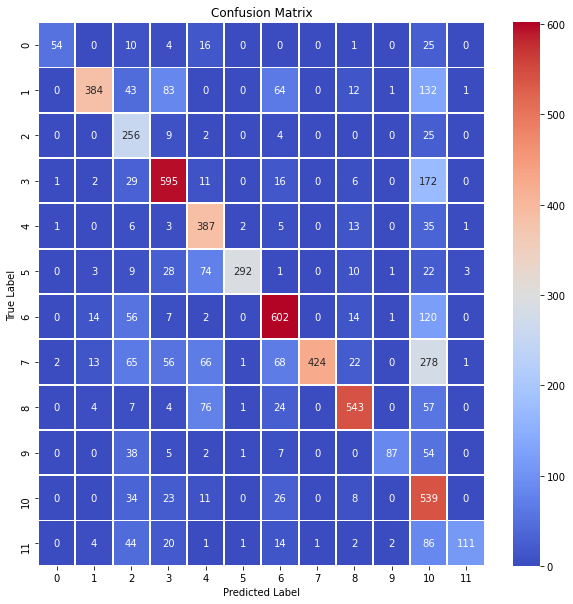

In [20]:
matrix = metrics.confusion_matrix(Y_val, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(matrix,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=list(set(Y)),
            yticklabels=list(set(Y)),
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The performance of the model is good for most of the classes. The classes with more examples performed better as expected.

# Evaluation on Test set

In [21]:
#Import data and labels
X_raw_test = open('xtest_obfuscated.txt', 'r')
X_test = [data.strip('\n') for data in X_raw_test]

In [22]:
test_size = len(X_test)
sequences_test = np.zeros((total_size, cfg.max_len), dtype=np.int)
for i in range(test_size):
    x = np.zeros(cfg.max_len, dtype=np.int)
    for j in range(cfg.max_len):
        if j < len(X_test[i]):
            x[j] = initialize_alpha_numeric(27)[X_test[i][j]]
        else:
            x[j] = 0
    sequences_test[i] = np.copy(x)

In [23]:
pred = model.predict(sequences_test)
y_test = np.zeros(test_size, dtype=np.int)
for i in range(test_size):
    y_test[i] = np.argmax(pred[i])
    
np.savetxt('y_pred.txt', [y_test],fmt='%i', delimiter='\n')

# Distribution of training and test set

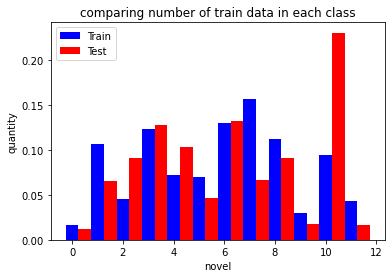

In [24]:
import matplotlib.pyplot as plt

plt.hist(Y, bins=range(min(Y), max(Y) + 2, 1),density = True,
              alpha=1,rwidth =0.5,align ='left', color="blue",label = 'Train')
plt.hist(y_test, bins=range(min(y_test), max(y_test) + 2, 1),density = True,
              alpha=1,rwidth =0.5,align ='mid', color="red",label = 'Test')
plt.xlabel("novel")
plt.ylabel("quantity")
plt.title("comparing number of train data in each class")
plt.legend()
plt.show()

The distribution of the data is almost same in the test and training data set giving good confidence for the model performance.